In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

---

# TweetsCov19 & TweetsKB

- 

***

In [10]:
#Labels
TweetsCov19_labels = ['Tweet_Id', 'Benutzername', 'Zeitstempel', 'Abonnenten', 'Abonnierten', 'Retweets', 'Likes', 'Entities', 'Stimmung', 'Erwähnungen', 'Hashtags', 'URLs', 'Text', 'Ist_gelöscht']
TweetsKB_labels    = ['Tweet Id', 'Benutzername', 'Zeitstempel', 'Abonnenten', 'Abonnierten', 'Retweets', 'Likes', 'Text', 'URLs', 'Ist_gelöscht']
#Pfad
TweetsCov19_Pfad =  'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/TweetsCov19_stichprobe.tsv'
TweetsKB_Pfad    = 'C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_sample/tweetsKB_stichprobe.tsv'

In [5]:
#Dataframe TweetsCov19 lesen
df_tweetscov19 = pd.read_csv(TweetsCov19_Pfad, sep='\t', error_bad_lines=False, names=TweetsCov19_labels)
print('Form', df_tweetscov19.shape)
df_tweetscov19.head()

Form (9409841, 14)


,Tweet_Id,Benutzername,Zeitstempel,Abonnenten,Abonnierten,Retweets,Likes,Entities,Stimmung,Erwähnungen,Hashtags,URLs,Text,Ist_gelöscht
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,2019-09-30 22:00:01+00:00,764191,132,19,180,foodie:Foodie:-2.096663959988218;,1 -1,null;,HalloweenTime?,null;,Has your appetite materialized just as fast as...,True
1,1178791641601232896,627f7d4ef584ba33a676a4ebcb861cdb,2019-09-30 22:00:02+00:00,321189,26833,32,43,mainland china:Mainland_China:-1.6252666161640...,1 -1,null;,HongKong,https://www.catholicnewsagency.com/news/amid-h...,The persecution of Catholics in mainland China...,False
2,1178791643509612547,7966d5716c1c4f33591b17755184e3d6,2019-09-30 22:00:03+00:00,14209,10623,90,182,brexit:Brexit:-1.582809637810362;hear hear:Hea...,1 -2,null;,Brexit,null;,"Hear, hear..\nEmily: You were an outspoken cri...",False
3,1178791644214235137,f17996c036ed4cd981f5448fe00d9ed2,2019-09-30 22:00:03+00:00,2264986,655,60,528,null;,3 -1,amstandardca.,BlueJays,null;,We wrapped up the season with a WINNING week! ...,False
4,1178791645371875329,32a54e5f6d8a67de1bffd2e689594dc8,2019-09-30 22:00:03+00:00,171,138,33,117,my family:My_Family:-2.6353832182503094;roll t...,4 -1,null;,null;,null;,Super excited to announce that I will be spend...,False


In [6]:
#Gelöschte und nicht gelöschte Tweets trennen.
df_del_cov19 = df_tweetscov19[df_tweetscov19['Ist_gelöscht'] == True]
df_undel_cov19 = df_tweetscov19[df_tweetscov19['Ist_gelöscht'] == False]

In [11]:
#Dataframe TweetsKB lesen
df_tweetskb = pd.read_csv(TweetsKB_Pfad, sep='\t', error_bad_lines=False, names=TweetsKB_labels)
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (9409841, 10)


,Tweet Id,Benutzername,Zeitstempel,Abonnenten,Abonnierten,Retweets,Likes,Text,URLs,Ist_gelöscht
0,1178791636039589889,DCComics,2019-09-30 22:00:01+00:00,3349606,563,2,13,"Today on #DCDaily, the crew takes a deep dive ...",http://bit.ly/2mlNYpS:-:,False
1,1178791641265639424,seanberdyz,2019-09-30 22:00:02+00:00,1203,499,4,20,𝘪’𝘮 𝘨𝘰𝘯𝘯𝘢 𝘣𝘦 𝘳𝘪𝘨𝘩𝘵 𝘩𝘦𝘳𝘦 ⟶ https://t.co/kOxWQL5...,http://ourownside.carrd.co:-:,True
2,1178791640573579264,AnArtistAtBirth,2019-09-30 22:00:02+00:00,109,215,0,0,❛ 𝘠𝘰𝘶'𝘳𝘦 𝘴𝘪𝘵𝘵𝘪𝘯' 𝘰𝘯 𝘺𝘰𝘶𝘳 𝘧𝘦𝘦𝘭𝘪𝘯𝘨𝘴 . . . 𝘐'𝘮 𝘴𝘪...,null;,True
3,1178791644797255680,lagosboygang,2019-09-30 22:00:03+00:00,571,1401,0,0,@Tiffany_o_ @UG_derrick That's the one i wanna...,null;,True
4,1178791648056217600,Phenom_Hoops,2019-09-30 22:00:04+00:00,25630,1674,1,1,2022 6’9 Perry Smith Jr. showcasing his high-m...,https://www.phenomhoopreport.com/2022-69-perry...,False


In [9]:
#Gelöschte und nicht gelöschte Tweets trennen.
df_del_kb = df_tweetskb[df_tweetskb['Ist_gelöscht'] == True]
df_undel_kb = df_tweetskb[df_tweetskb['Ist_gelöscht'] == False]

In [22]:
#Die Anzhal der geposteten Tweets pro Monat berechenen.

def get_tweets_per_month(dataframe):
    monaten = {}
    for i in dataframe['Zeitstempel']:
        monat = datetime.strptime(i, '%Y-%m-%d %H:%M:%S%z')
        m = monat.strftime('%B')
        if m not in monaten:
            monaten[m] = 1
        else:
            monaten[m] = monaten[m]+1
    m2 = { 'October': monaten['October'], 'November':monaten['November'], 'December':monaten['December'],'January': monaten['January'], 'February': monaten['February'], 'March': monaten['March'], 'April': monaten['April'], 'May': monaten['May']}
    print(monaten)
    return m2


In [23]:
del_dic_cov19 = get_tweets_per_month(df_del_cov19)
undel_dic_cov19 = get_tweets_per_month(df_undel_cov19)


{'September': 447, 'October': 153934, 'November': 141547, 'December': 146171, 'January': 161787, 'February': 143121, 'March': 511405, 'April': 485399, 'May': 393690}
{'September': 1224, 'October': 427223, 'November': 401781, 'December': 403657, 'January': 456580, 'February': 429612, 'March': 1911935, 'April': 1836599, 'May': 1403729}


In [24]:
del_dic_kb = get_tweets_per_month(df_del_kb)
undel_dic_kb = get_tweets_per_month(df_undel_kb)


{'September': 1207, 'October': 323860, 'November': 307563, 'December': 323691, 'January': 335844, 'February': 298610, 'March': 351102, 'April': 383484, 'May': 397216}
{'September': 2798, 'October': 764124, 'November': 733684, 'December': 758357, 'January': 816303, 'February': 746222, 'March': 910141, 'April': 963411, 'May': 992224}


In [25]:
#Die Zahlen an der Y-Achse pro Million zeigen  
def millions(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f}M'.format(x*1e-6)

#Die Verteilung der Tweets pro Monat zeigen.
def plot_tweets_pro_monat(nicht_geloescht_cov19, geloescht_cov19 , nicht_geloescht_kb, geloescht_kb, monaten):
    list_nicht_geloescht_cov19 = nicht_geloescht_cov19
    list_geloescht_cov19 = geloescht_cov19
    list_nicht_geloescht_kb = nicht_geloescht_kb
    list_geloescht_kb = geloescht_kb
    list_monaten = monaten

    x = np.arange(len(list_monaten))
    w = 0.3
    plt.rcParams["figure.figsize"] = [10,8]
    fig, ax = plt.subplots()

    ax.bar(x + w/2, list_geloescht_cov19, w, label='TweetsCov19(gelöscht)', color='peru', bottom = list_nicht_geloescht_cov19)
    ax.bar(x + w/2, list_nicht_geloescht_cov19, w, label='TweetsCov19(nicht gelöscht)', color='darkslateblue')
    ax.bar(x - w/2, list_geloescht_kb, w, label='TweetsKB(gelöscht)', color='khaki', bottom = list_nicht_geloescht_kb)
    ax.bar(x - w/2, list_nicht_geloescht_kb, w, label='TweetsKB(nicht gelöscht)', color='cornflowerblue')

    ax.set_ylabel('Anzahl der Tweets', fontsize=18)
    #ax.set_title('Aufteilung der geposteten und gelöschten Tweets', fontsize=14, fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(list_monaten, fontsize=19,  rotation='45')
    ax.legend(fontsize=16)
    ax.yaxis.set_major_formatter(millions)
    ax.tick_params(axis='y', which='major', labelsize=16)

    fig.tight_layout()
    plt.show()

    pfad='C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/tweetskb/tweetskb_tweetsCov19_sample_pro_monat_3.pdf'
    fig.savefig(pfad)


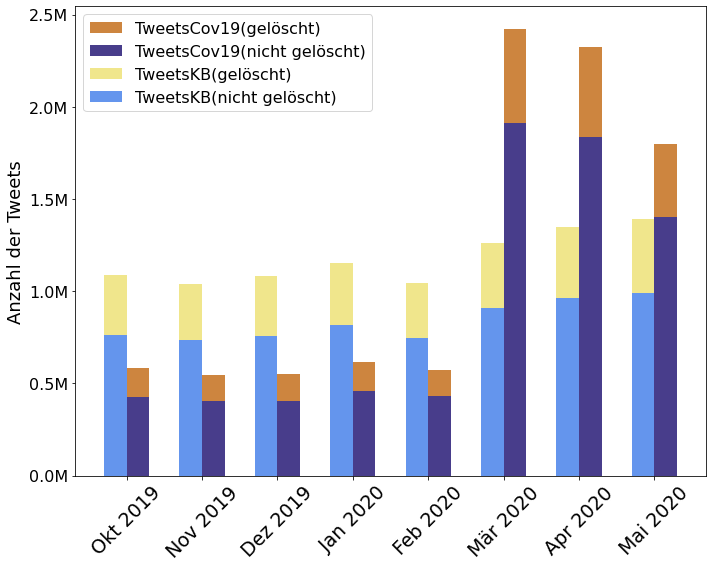

In [26]:
plot_tweets_pro_monat(list(undel_dic_cov19.values()), list(del_dic_cov19.values()), list(undel_dic_kb.values()), list(del_dic_kb.values()),  [ 'Okt 2019', 'Nov 2019', 'Dez 2019', 'Jan 2020', 'Feb 2020', 'Mär 2020', 'Apr 2020', 'Mai 2020'])


In [27]:
#Die Verteilung der Tweets pro Monat zeigen.
#Englische Labels
def plot_tweets_pro_monat_en(nicht_geloescht_cov19, geloescht_cov19 , nicht_geloescht_kb, geloescht_kb, monaten):
    list_nicht_geloescht_cov19 = nicht_geloescht_cov19
    list_geloescht_cov19 = geloescht_cov19
    list_nicht_geloescht_kb = nicht_geloescht_kb
    list_geloescht_kb = geloescht_kb
    list_monaten = monaten

    x = np.arange(len(list_monaten))
    w = 0.3
    plt.rcParams["figure.figsize"] = [10,8]
    fig, ax = plt.subplots()

    ax.bar(x + w/2, list_geloescht_cov19, w, label='TweetsCov19(Deleted)', color='peru', bottom = list_nicht_geloescht_cov19)
    ax.bar(x + w/2, list_nicht_geloescht_cov19, w, label='TweetsCov19(Non-deleted)', color='darkslateblue')
    ax.bar(x - w/2, list_geloescht_kb, w, label='TweetsKB(Deleted)', color='khaki', bottom = list_nicht_geloescht_kb)
    ax.bar(x - w/2, list_nicht_geloescht_kb, w, label='TweetsKB(Non-deleted)', color='cornflowerblue')

    ax.set_ylabel('Number of Tweets', fontsize=18)
    #ax.set_title('Breakdown of posted and deleted tweets', fontweight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(list_monaten, fontsize=19,  rotation='45')
    ax.yaxis.set_major_formatter(millions)
    ax.legend(fontsize=16)
    ax.tick_params(axis='y', which='major', labelsize=16)

    fig.tight_layout()
    plt.show()

    pfad='C:/Mo/tweetDB/tweetscov19/TweetsCov19_tsv/data_aus_tsv/plot/tweetskb/pdfs/tweetskb_tweetsCov19_sample_pro_monat_3.pdf'
    fig.savefig(pfad)


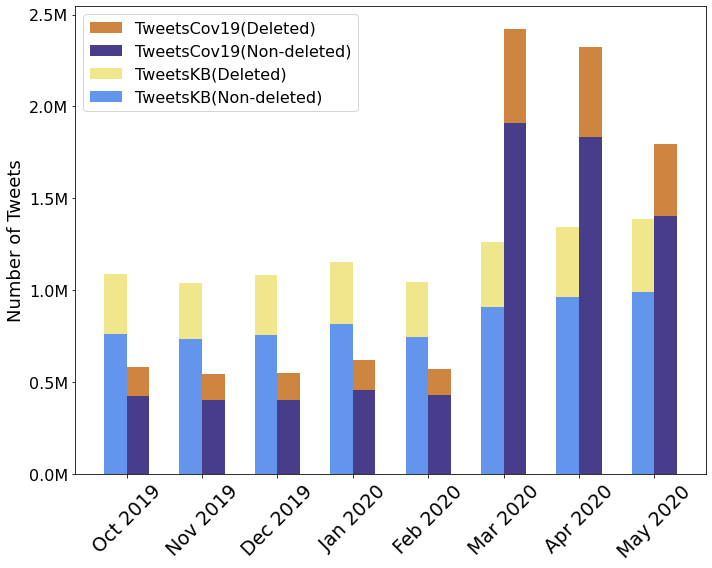

In [28]:
plot_tweets_pro_monat_en(list(undel_dic_cov19.values()), list(del_dic_cov19.values()), list(undel_dic_kb.values()), list(del_dic_kb.values()),  [ 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020'])
